In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [61]:
bus = pd.read_excel('bus.xlsx')
people = pd.read_excel('seoulmarket.xlsx')
park = pd.read_excel('seoulpark.xlsx')
subway = pd.read_excel('seoul_subway.xlsx')

In [62]:
park_location = park[['위도','경도']]
bus_location = bus[['위도','경도']]
people_location = people[['위도','경도']]
subway_location = subway[['위도','경도']]

In [63]:
bus_location = bus_location.fillna(0)
park_location = park_location.fillna(0)
people_location = people_location.fillna(0)
subway_location = subway_location.fillna(0)

In [64]:
park_fin =park_location[(park_location['위도']>0) &(park_location['경도']>0) &(park_location['위도']<38) &(park_location['경도']<128)]
peo_fin =people_location[(people_location['위도']>0) &(people_location['경도']>0) &(people_location['위도']<38) &(people_location['경도']<128)]
bus_fin =bus_location[(bus_location['위도']>0) &(bus_location['경도']>0) &(bus_location['위도']<38) &(bus_location['경도']<128)]
sub_fin =subway_location[(subway_location['위도']>0) &(subway_location['경도']>0) &(subway_location['위도']<38) &(subway_location['경도']<128)]

In [65]:
park_fin['class']=0
peo_fin['class']=1
bus_fin['class']=2
sub_fin['class']=3

C:\Users\dongy\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dongy\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
final = park_fin.append(peo_fin)
final = final.append(bus_fin)
final = final.append(sub_fin)

In [66]:
final[final['class']==1]

,위도,경도,class,index
0,37.557653,126.922648,1,814
1,37.558227,126.925311,1,815
2,37.557405,126.926047,1,816
3,37.566601,126.967096,1,817
4,37.566337,126.965843,1,818
5,37.559332,126.938957,1,819
6,37.559248,126.945670,1,820
7,37.544527,126.973545,1,821
8,37.530823,126.971538,1,822
9,37.533156,126.960157,1,823


In [67]:
a = []
for i in range(len(final)):
    a.append(i+1)

final['index'] = a

In [68]:
final_please_last = final.set_index(final['index'])

In [69]:
neigh = NearestNeighbors(n_neighbors=150)
neigh.fit(final_please_last[['위도','경도']].values)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=150, p=2, radius=1.0)

In [70]:
len(final_please_last[final_please_last['class']==1].values)

4346

In [71]:
len(final_please_last['class']!=0)

104453

In [72]:
len(df[df['class']==1])

23

In [73]:
## 내꺼   스코어링까진 됬음.. 어디 인지 확인중

###   스코어링 원본

In [74]:
## 주차장한개의 위치에 주변 150개 클러스터 했을때 총 유동인구 수와   버스 정류장 과 지하철 역 개수 
## a = 주차장    b = 상권 개수    c = 버스정류장 개수  d = 지하철역 개수
num_station = []
my_score = []
## best case  : b - c*0.001 - d*0.01
## 현재 스코어 모델은 50점 이상정도만 유효한 지표를 나타냄
for i in final_please_last[final_please_last['class'] == 0].index:
    df = final_please_last.iloc[neigh.kneighbors([final_please_last[['위도','경도']].values[i-1]])[1].tolist()[0]]
    a = len(df[df['class']==0])
    b = len(df[df['class']==1])
    c = len(df[df['class']==2])
    d = len(df[df['class']==3])
    df2 = final_please_last[final_please_last['class'] == 0]  ## 주차장 위도 경도 위치 확인 하려궁..
    eerr = df2[['위도','경도']].values                        ## 가져와써  근데.. 아웃 바운드래.. 여기까지만 해봤음
    score = b - c*0.03 - d*0.15
    dics = {tuple(eerr[i-1]) : score}
    my_score.append(dics)

In [75]:
df = final_please_last.iloc[neigh.kneighbors([final_please_last[['위도','경도']].values[3]])[1].tolist()[0]]
len(df[df['class']==1]) ,len(df[df['class']==2]) ,len(df[df['class']==3]) 

(20, 128, 0)

In [76]:
df[df['class']==1]

,위도,경도,class,index
index,,,,
4089,37.575102,126.979036,1,4089
4211,37.575529,126.979403,1,4211
3954,37.574639,126.978680,1,3954
4315,37.575656,126.979549,1,4315
3811,37.574477,126.978614,1,3811
4406,37.575757,126.979729,1,4406
3658,37.574412,126.979441,1,3658
4486,37.575786,126.980000,1,4486
3487,37.574204,126.979399,1,3487


In [77]:
for i in range(1, len(my_score)): # 리스트의 크기만큼 반복
    for j in range(i, 0, -1): # j 인덱스의 값이 줄어드면서 삽입할 위치를 찾을 때까지 반복
        if list(my_score[j].values())[0] > list(my_score[j-1].values())[0]: # 현재 인덱스가 앞의 원소보다 작다면
            my_score[j], my_score[j-1] = my_score[j-1], my_score[j] # swap해서 값 뒤로 밀어내기
        else : break

In [78]:
my_score

[{(37.574434000000004, 126.97351499999999): 62.45},
 {(37.5198200485, 127.03276393899999): 57.36},
 {(37.5103117, 127.046377645): 51.970000000000006},
 {(37.569414, 127.01226899999999): 51.06},
 {(37.559175, 126.985564): 50.15},
 {(37.559175, 126.98550300000001): 50.15},
 {(37.5691388, 127.0121287): 49.0},
 {(37.5228966186, 127.037014229): 47.06},
 {(37.5140472661, 127.029549069): 46.910000000000004},
 {(37.4953738379, 127.033282484): 43.94},
 {(37.5674439, 127.0167756): 43.79},
 {(37.556955, 126.98581100000001): 42.97},
 {(37.559828, 126.988345): 42.88},
 {(37.5609387249, 127.065767598): 40.88},
 {(37.506627181, 127.057346028): 40.85},
 {(37.560407916500004, 127.067578025): 40.82},
 {(37.563489600100006, 127.033131666): 39.94},
 {(37.56813, 126.97799499999999): 39.06},
 {(37.541035, 127.12883500000001): 38.88},
 {(37.5097328683, 127.051652471): 38.730000000000004},
 {(37.5025141908, 127.03039046200001): 37.76},
 {(37.574496, 126.994045): 37.459999999999994},
 {(37.5617055133, 127.0606

### 조교님이 만들어 주심 조금 손봐아됨

In [156]:
## 주차장한개의 위치에 주변 150개 클러스터 했을때 총 유동인구 수와   버스 정류장 과 지하철 역 개수 
## a = 주차장    b = 유동인구   c = 버스정류장 개수  d = 지하철역 개수
num_station = []
my_score2 = []

for i in final_please_last[final_please_last['class'] == 0].index:
    df = final_please_last.iloc[neigh.kneighbors([final_please_last[['위도','경도']].values[i-1]])[1].tolist()[0]]
    a = len(df[df['class']==0])
    b = df[df['class']==1]['유동인구'].sum()
    c = len(df[df['class']==2])
    d = len(df[df['class']==3])
#     if d >=1 and c <120:
#         score = b - 500000 * c - 100000*d
    
#     else:
#         score = b - 5000*c - 30000*d
    
    df2 = final_please_last[final_please_last['class'] == 0]  ## 주차장 위도 경도 위치 확인 하려궁..
    eerr = df2[['위도','경도']].values                        ## 가져와써  근데.. 아웃 바운드래.. 여기까지만 해봤음
    score = b - c*5000 - d*2000000
    #score = b - 50000*c - 30000*d
    dics = {tuple(eerr[i-1]) : score}
    my_score2.append(dics)

In [130]:
df = final_please_last.iloc[neigh.kneighbors([final_please_last[['위도','경도']].values[0]])[1].tolist()[0]]

In [131]:
len(df[df['class']==2])

131

In [157]:
for i in range(1, len(my_score2)): # 리스트의 크기만큼 반복
    for j in range(i, 0, -1): # j 인덱스의 값이 줄어드면서 삽입할 위치를 찾을 때까지 반복
        if list(my_score2[j].values())[0] > list(my_score2[j-1].values())[0]: # 현재 인덱스가 앞의 원소보다 작다면
            my_score2[j], my_score2[j-1] = my_score2[j-1], my_score2[j] # swap해서 값 뒤로 밀어내기
        else : break

In [158]:
my_score2

[{(37.484771, 126.925676): 3469270.0},
 {(37.510226200000005, 126.9186082): 3073751.0},
 {(37.48504129999999, 126.9221169): 2789024.0},
 {(37.5891843026, 127.075783364): 2778092.0},
 {(37.500223600000005, 127.08710490000001): 2561868.0},
 {(37.5018267, 127.09398459999998): 2435613.0},
 {(37.487364, 126.9233928): 2378495.0},
 {(37.504727, 127.02098799999999): 2204737.0},
 {(37.559666, 126.90645400000001): 2179807.0},
 {(37.5935900796, 127.078650313): 2139268.0},
 {(37.601562, 126.92051599999999): 1914607.0},
 {(37.47725517, 126.9767875): 1824120.0},
 {(37.669740000000004, 127.03698999999999): 1776758.0},
 {(37.4867002, 126.9176975): 1756843.0},
 {(37.548438065300004, 127.02338847899999): 1720313.0},
 {(37.507959899999996, 126.9070328): 1615830.0},
 {(37.470008, 127.044326): 1542043.0},
 {(37.611602000000005, 127.033569): 1520245.0},
 {(37.565053799999994, 127.022888): 1510524.0},
 {(37.625019, 127.033142): 1489452.0},
 {(37.643575, 127.025053): 1452900.0},
 {(37.67646, 127.03277): 14079

In [37]:
my_score[0][37.612215534899995, 126.956540131]

111788.1368

In [38]:
my_score[0]

{(37.612215534899995, 126.956540131): 111788.1368}

In [39]:
list(my_score[0].values())[0]

111788.1368

In [ ]:
##  네.. 스코어링 성공 했구.. 순차 정렬 까지 했어요~ 이게 맞는지는 내일 알겠죵.. 

In [40]:
for i in range(1, len(my_score)): # 리스트의 크기만큼 반복
    for j in range(i, 0, -1): # j 인덱스의 값이 줄어드면서 삽입할 위치를 찾을 때까지 반복
        if list(my_score[j].values())[0] > list(my_score[j-1].values())[0]: # 현재 인덱스가 앞의 원소보다 작다면
            my_score[j], my_score[j-1] = my_score[j-1], my_score[j] # swap해서 값 뒤로 밀어내기
        else : break

In [41]:
my_score

[{(37.564964, 127.01695900000001): 5157865.401500001},
 {(37.565173, 127.01698999999999): 5157865.401500001},
 {(37.559502, 127.012175): 4521932.79},
 {(37.55956, 127.012171): 4521932.79},
 {(37.562026, 127.014296): 4453030.85},
 {(37.558921000000005, 127.01339250000001): 4231103.6117},
 {(37.558923, 127.01334399999999): 4231103.6117},
 {(37.484771, 126.925676): 3947781.592},
 {(37.5674439, 127.0167756): 3913780.4472},
 {(37.510226200000005, 126.9186082): 3643379.3627},
 {(37.488813, 126.992088): 3473524.998},
 {(37.48504129999999, 126.9221169): 3279226.748},
 {(37.5891843026, 127.075783364): 3222187.626},
 {(37.531212, 127.12990500000001): 3107588.7584},
 {(37.500223600000005, 127.08710490000001): 3082270.7652},
 {(37.5018267, 127.09398459999998): 2994548.7053},
 {(37.567395, 127.01818899999999): 2908626.2462999998},
 {(37.567526, 127.018123): 2908626.2462999998},
 {(37.487364, 126.9233928): 2896281.555},
 {(37.504284999999996, 127.018491): 2861247.9427},
 {(37.504727, 127.02098799999

In [103]:
len(final_please_last[final_please_last['class'] == 0])

813

In [112]:
eerr[812]

array([ 37.56192975, 127.05909519])

In [54]:
df = final_please_last.iloc[neigh.kneighbors([final_please_last[['위도','경도']].values[0]])[1].tolist()[0]]

In [90]:
df2 = final_please_last[final_please_last['class'] == 0]
eerr1 = df2[['위도','경도']]

In [86]:
tuple(eerr[0])

(37.612215534899995, 126.956540131)

In [91]:
eerr1

,위도,경도
index,,
1,37.612216,126.956540
2,37.591011,126.996857
3,37.573682,126.983586
4,37.575339,126.978885
5,37.587434,126.982827
6,37.578306,126.989300
7,37.568979,126.988595
8,37.571651,126.973901
9,37.572601,126.991963


In [69]:
df[df['class']==1]['유동인구'].sum()

113272.0

In [33]:
final_please_last[['위도','경도']]

,위도,경도
index,,
1,37.612216,126.956540
2,37.591011,126.996857
3,37.573682,126.983586
4,37.575339,126.978885
5,37.587434,126.982827
6,37.578306,126.989300
7,37.568979,126.988595
8,37.571651,126.973901
9,37.572601,126.991963


In [145]:
##조교님꺼  아래꺼

In [ ]:
num_station = []
for i in final_please_last[final_please_last['class'] == 0].index:
    num_station.append(final_please_last.iloc[neigh.kneighbors([final_please_last[['위도','경도']].values[i-1]])[1].tolist()[0]]['class'].values.sum())

In [17]:
for num in num_station:
    print(num)

280
256
286
283
256
256
288
293
281
292
298
290
268
292
271
269
285
291
280
293
290
291
292
281
284
283
275
276
276
276
276
250
246
247
226
292
242
247
244
250
252
264
284
292
278
288
272
247
274
270
260
258
271
286
268
267
254
270
282
282
274
282
278
264
236
256
292
299
268
283
287
260
268
276
273
276
282
282
292
286
280
284
270
258
273
268
285
272
288
294
294
275
254
252
282
274
277
289
281
254
261
274
280
261
259
266
268
262
244
256
266
252
264
262
262
296
298
287
297
297
292
257
292
296
294
298
284
288
284
262
265
274
218
267
280
256
271
262
218
252
290
266
273
260
272
269
259
292
222
261
263
248
282
291
270
290
246
290
272
288
280
277
282
259
290
265
267
296
272
265
280
278
272
288
227
288
284
266
271
295
291
294
298
287
287
297
292
297
289
293
299
287
296
297
297
290
287
294
278
282
298
294
282
286
298
293
291
298
281
284
288
292
280
286
290
290
277
292
292
293
282
273
290
279
278
277
298
279
296
299
287
295
282
290
246
296
272
288
272
273
276
259
292
290
270
267
298
272
267
279


In [124]:
final[final['class']==1]

,class,경도,위도,유동인구,index
0,1.0,126.904174,37.554485,79025.0,814
1,1.0,127.063589,37.597656,201839.0,815
2,1.0,127.067104,37.593819,113566.0,816
3,1.0,127.065702,37.595623,24292.0,817
4,1.0,127.063293,37.593452,28612.0,818
5,1.0,127.064169,37.595821,9557.0,819
6,1.0,127.061003,37.595922,18153.0,820
7,1.0,126.974462,37.552311,46987.0,821
8,1.0,126.979682,37.547440,30489.0,822
9,1.0,126.975994,37.550331,14018.0,823


In [8]:
bus_fin.head()

,위도,경도
0,37.552358,126.981546
1,37.555309,126.983981
2,37.560915,126.992484
3,37.562423,126.999966
4,37.550743,126.998821


(126.8, 127)

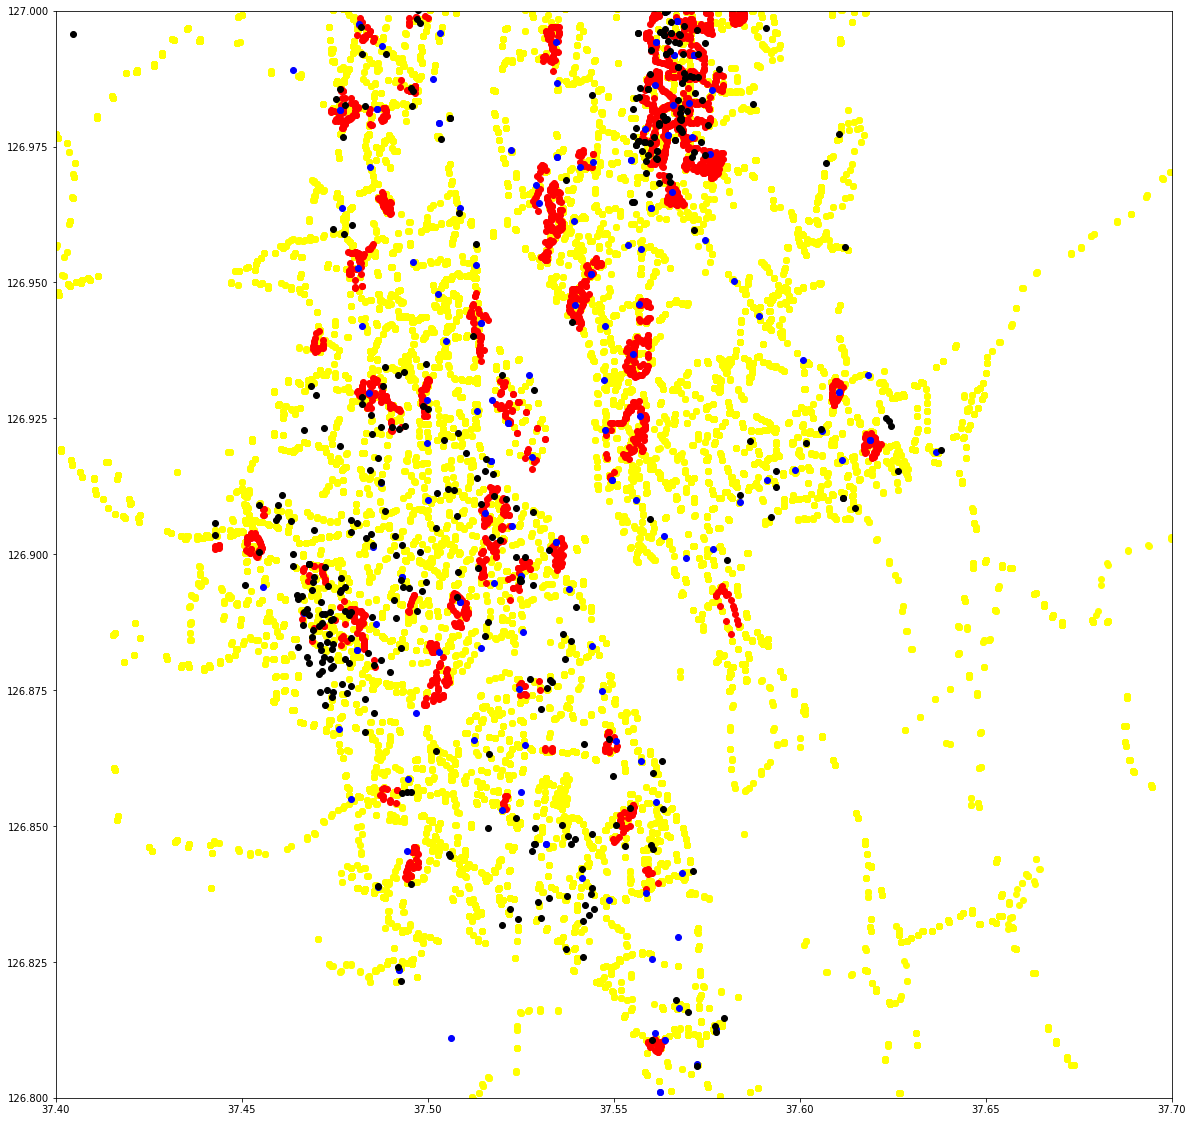

In [22]:
plt.figure(figsize=(20,20))
plt.scatter(bus_fin['위도'],bus_fin['경도'],color='yellow')
plt.scatter(peo_fin['위도'],peo_fin['경도'],color='red')
plt.scatter(sub_fin['위도'],sub_fin['경도'],color='blue')
plt.scatter(park_fin['위도'],park_fin['경도'],color='black')
plt.xlim(37.4,37.7)
plt.ylim(126.8,127)